In [1]:
'''
    Các kỹ thuật augumentations YOLO phổ biến
        Horizontal/Vertical Flip: Đảo ngược ảnh theo chiều ngang hoặc dọc.
        Rotation: Xoay ảnh trong một khoảng góc nhất định (ví dụ: ±20 độ).
        Scaling/Resizing: Thay đổi kích thước ảnh mà vẫn giữ nguyên tỷ lệ của bounding boxes.
        Random Cropping: Cắt ngẫu nhiên vùng ảnh, đảm bảo bounding boxes không bị sai lệch.
        Color Jitter: Điều chỉnh độ sáng, tương phản, độ bão hòa, và màu sắc của ảnh.
        Gaussian Blur/Motion Blur: Áp dụng mờ Gaussian hoặc mờ theo chuyển động để mô phỏng nhiễu.
        Noise Injection: Thêm nhiễu ngẫu nhiên vào ảnh để tăng khả năng chống chịu của mô hình.
'''

'\n    Các kỹ thuật augumentations YOLO phổ biến\n        Horizontal/Vertical Flip: Đảo ngược ảnh theo chiều ngang hoặc dọc.\n        Rotation: Xoay ảnh trong một khoảng góc nhất định (ví dụ: ±20 độ).\n        Scaling/Resizing: Thay đổi kích thước ảnh mà vẫn giữ nguyên tỷ lệ của bounding boxes.\n        Random Cropping: Cắt ngẫu nhiên vùng ảnh, đảm bảo bounding boxes không bị sai lệch.\n        Color Jitter: Điều chỉnh độ sáng, tương phản, độ bão hòa, và màu sắc của ảnh.\n        Gaussian Blur/Motion Blur: Áp dụng mờ Gaussian hoặc mờ theo chuyển động để mô phỏng nhiễu.\n        Noise Injection: Thêm nhiễu ngẫu nhiên vào ảnh để tăng khả năng chống chịu của mô hình.\n'

In [2]:
import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow

In [6]:
image_url = "https://paradepets.com/.image/c_limit%2Ccs_srgb%2Cq_auto:good%2Cw_700/MTkxMzY1Nzg4Njc2NzI4NDE4/golden-retriever.jpg"
response = requests.get(image_url, stream = True)
# Save the image
with open("dog.jpg", "wb") as f:
  f.write(response.content)

print("Image downloaded and saved as corgi.jpg")

Image downloaded and saved as corgi.jpg


In [7]:
class Augumentations:
  def __init__(self, ):
    pass

  def flip(self, image: np.ndarray,  mode: int = 0) -> np.ndarray:
    '''
      image: ảnh đầu vào
      Mode = 0: Vertical flip
      Mode = 1: Hozizontal flip
      Mode = -1: 2 dimentions flip

      Return: Ảnh đã lật (numpy array).
    '''
    if mode == 0:
        result = cv2.flip(image, 0)
    elif mode == 1:
        result = cv2.flip(image, 1)
    else:
        result = cv2.flip(image, -1)
    return result


  def rotate_image(self, image: np.ndarray, angle: float, scale: float = 1.0) -> np.ndarray:
    '''
      image: ảnh đầu vào
      angle: Góc xoay (độ). Dương là xoay ngược kim đồng hồ.
      scale: Tỷ lệ ảnh sau khi xoay (1.0 là giữ nguyên kích thước).

      Return: Ảnh đã xoay (numpy array).
    '''
    (h, w) = image.shape[:2]
    center = (h // 2, w // 2)

    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

    return rotated_image


  def resize(self, image: np.ndarray, width:int, height:int, interpolation=cv2.INTER_LINEAR) -> np.ndarray:
    '''
      image: ảnh đầu vào
      width: Chiều rộng mong muốn.
      height: Chiều cao mong muốn.
      interpolation: Phương pháp nội suy (cv2.INTER_LINEAR mặc định).

      Return: Ảnh đã thay đổi kích thước (numpy array).
    '''
    return cv2.resize(image, (width, height), interpolation=interpolation)

  def crop(self,image: np.ndarray, crop_size: int = 100, num_crops :int=5) -> np.ndarray:
    '''
      image: ảnh đầu vào
      crop_size: Kích thước mặc định của cạnh ô vuông (mặc định 100).
      num_crops: Số lượng ô vuông cần cắt.

      Return: Ảnh đã cắt (numpy array).
    '''
    h, w = image.shape[:2]

    if crop_size > min(h, w):
        raise ValueError("Kích thước ô vuông lớn hơn kích thước ảnh ban đầu.")

    masked_image = image.copy()

    for _ in range(num_crops):
        x_start = np.random.randint(0, w - crop_size + 1)
        y_start = np.random.randint(0, h - crop_size + 1)

        masked_image[y_start:y_start + crop_size, x_start:x_start + crop_size] = (0, 0, 0)

    return masked_image

  def color_jitter(self, image: np.ndarray, brightness: float = None, contrast:float = None, saturation: float = None, hue: float = None) -> np.ndarray:
    '''
        image: ảnh đầu vào
        brightness, contrast, saturation: Mức thay đổi, giá trị [0, 1] (ngẫu nhiên).
        hue: Mức thay đổi màu, giá trị [0, 0.5].

        Return: Ảnh đã biến đổi (numpy array).
    '''

    alpha = 1.0 + np.random.uniform(-contrast, contrast)  # Tương phản
    beta = np.random.uniform(-brightness * 255, brightness * 255)  # Độ sáng
    jittered_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    # Chuyển từ BGR sang HSV để điều chỉnh saturation và hue
    hsv = cv2.cvtColor(jittered_image, cv2.COLOR_BGR2HSV).astype(np.float32)

    # Điều chỉnh độ bão hòa (saturation) và màu sắc (hue)
    hsv[:, :, 1] *= 1 + np.random.uniform(-saturation, saturation)  # Saturation
    hsv[:, :, 0] += np.random.uniform(-hue * 180, hue * 180)  # Hue

    # Đảm bảo giá trị hợp lệ
    hsv = np.clip(hsv, 0, 255).astype(np.uint8)
    jittered_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return jittered_image

  def gaussian_blur(self, image: np.ndarray, kernel_size: int =5) ->np.ndarray:
    """
        image: ảnh đầu vào
        kernel_size: Kích thước bộ lọc (phải là số lẻ).

        Return: Ảnh đã biến đổi (numpy array).
    """
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)


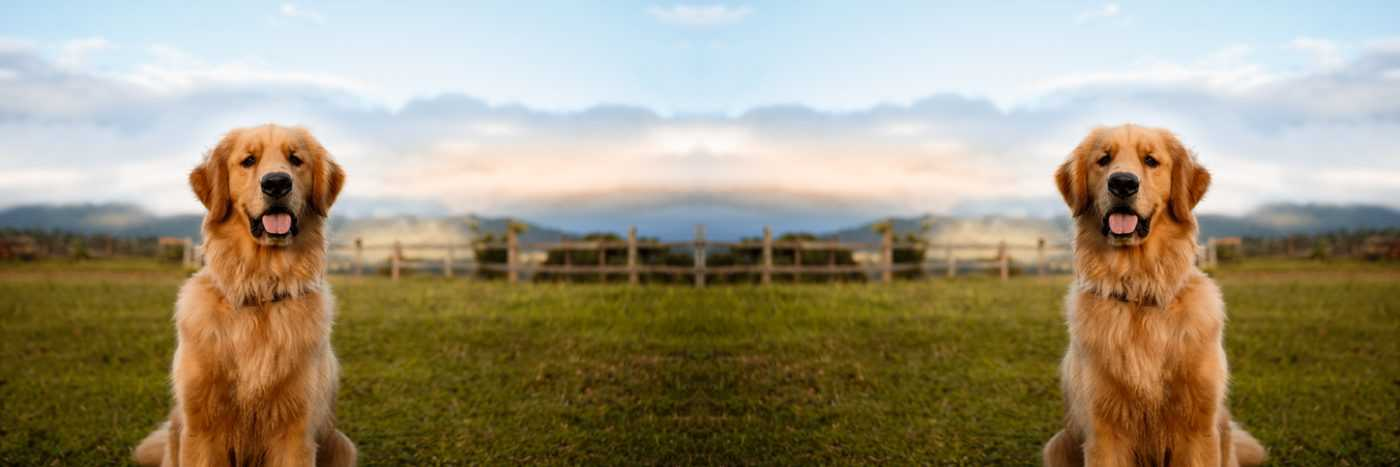

Hozizontalflip None


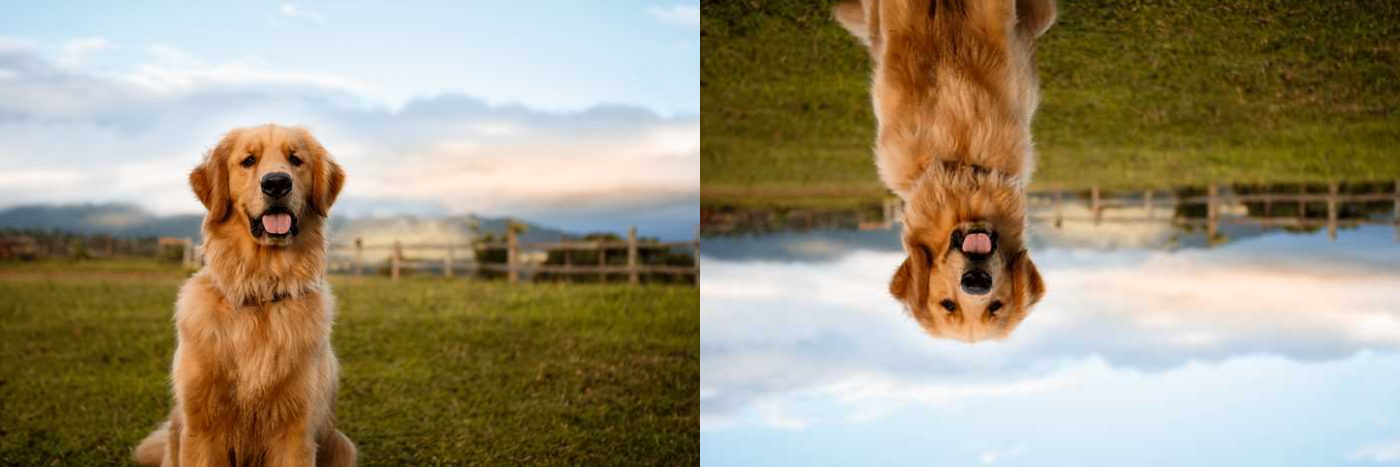

Verticalflip None


In [8]:
image = cv2.imread("/content/dog.jpg")
A = Augumentations()
hozizontalflip_image = A.flip(image=image, mode=1)
concatenated_image = np.concatenate((image, hozizontalflip_image), axis = 1)
print(f'Hozizontalflip {cv2_imshow(concatenated_image)}')
Verticalflip_image = A.flip(image=image, mode=0)
concatenated_image = np.concatenate((image, Verticalflip_image), axis = 1)
print(f'Verticalflip {cv2_imshow(concatenated_image)}')


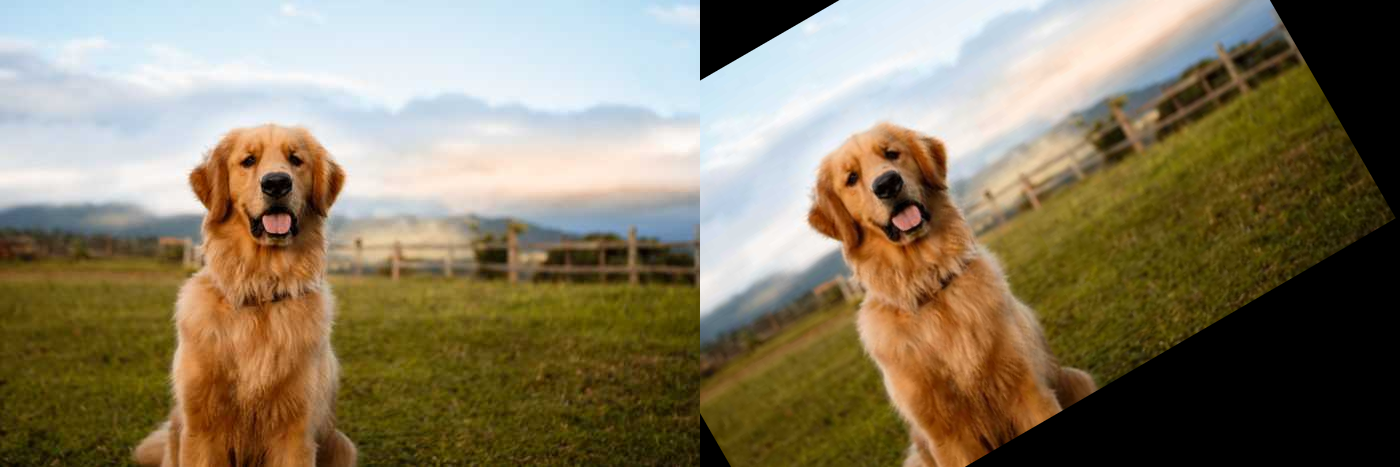

Rotate None


In [9]:
A = Augumentations()
rotated_image = A.rotate_image(image=image, angle=30, scale=1)
concatenated_image = np.concatenate((image, rotated_image), axis = 1)
print(f'Rotate {cv2_imshow(concatenated_image)}')


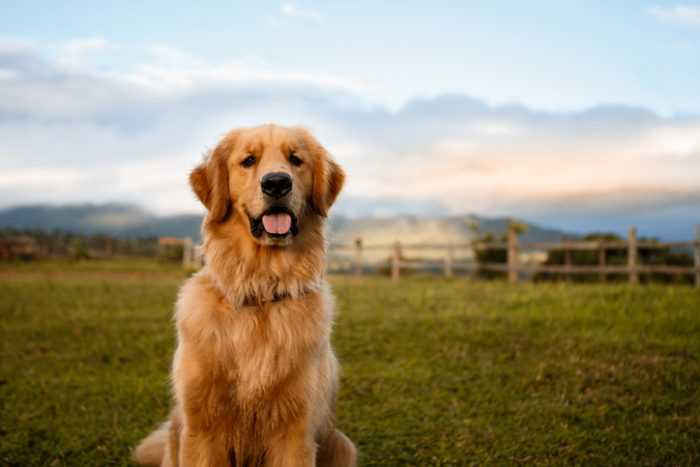

Original None


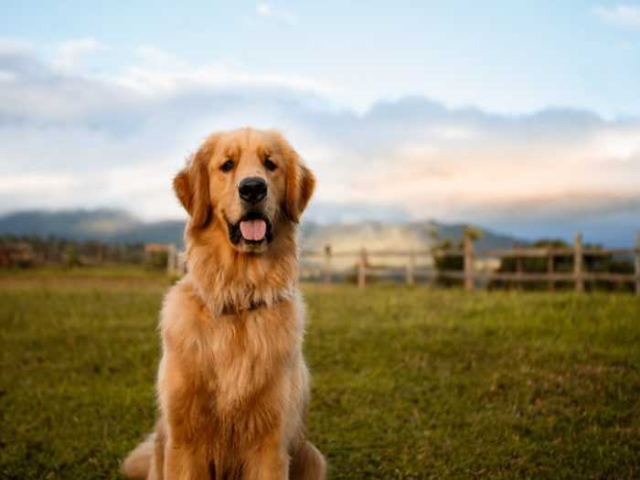

Resize None


In [10]:
A = Augumentations()
resized_image = A.resize(image=image, width=640, height=480)
print(f'Original {cv2_imshow(image)}')
print(f'Resize {cv2_imshow(resized_image)}')


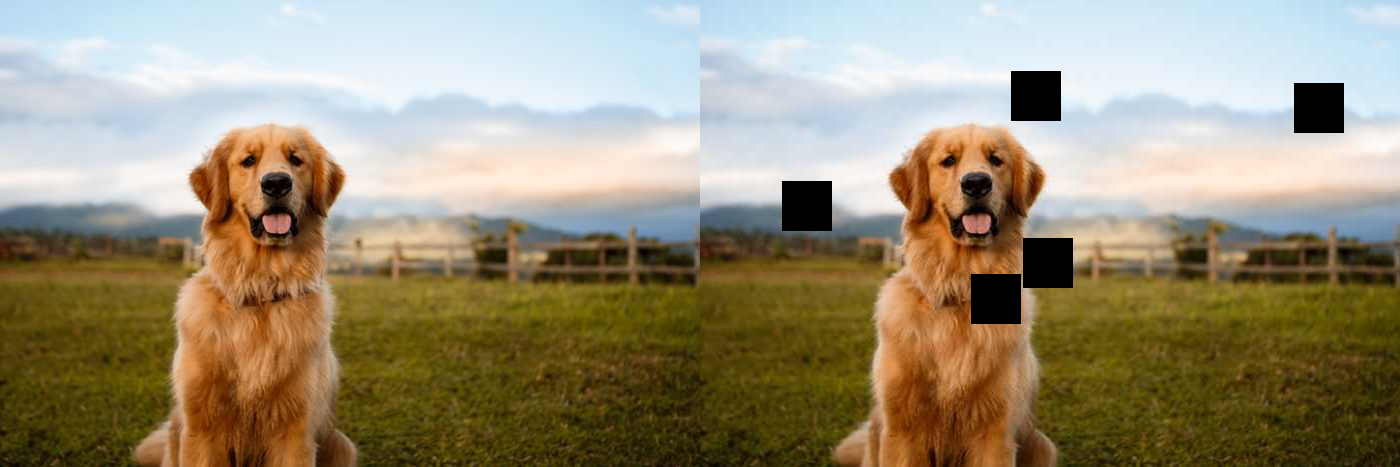

Crop None


In [11]:
A = Augumentations()
crop_image = A.crop(image=image, crop_size=50, num_crops=5)
concatenated_image = np.concatenate((image, crop_image), axis = 1)
print(f'Crop {cv2_imshow(concatenated_image)}')


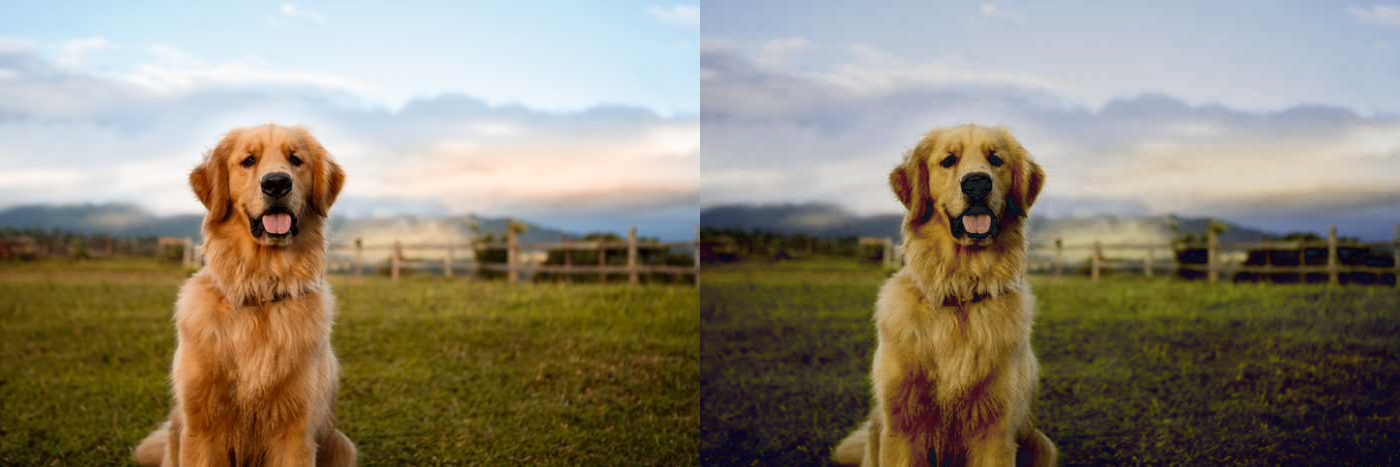

Crop None


In [12]:
A = Augumentations()
color_image = A.color_jitter(image=image, brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2)
concatenated_image = np.concatenate((image, color_image), axis = 1)
print(f'Crop {cv2_imshow(concatenated_image)}')


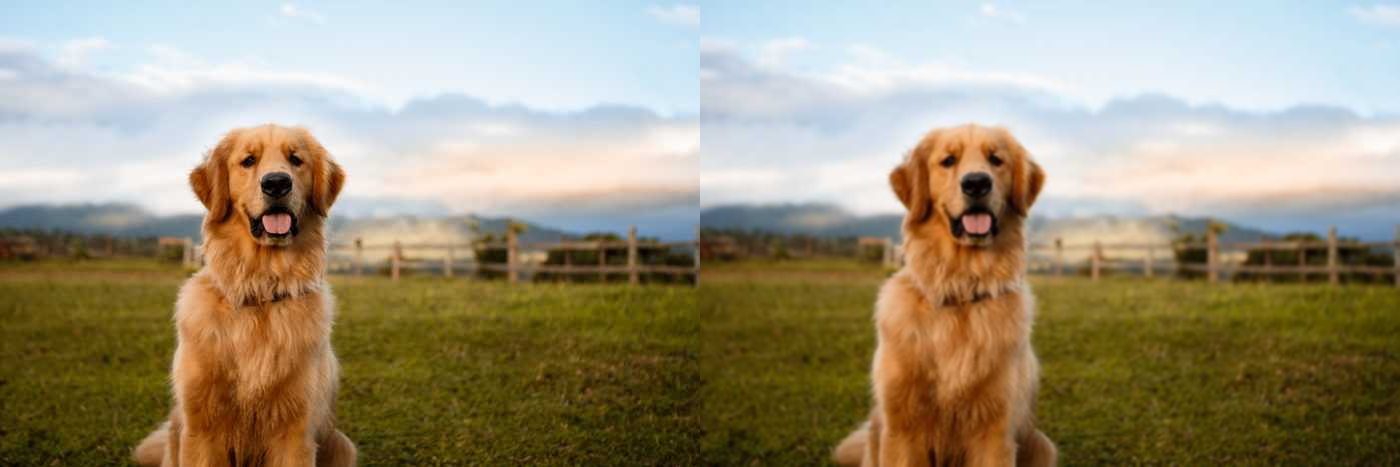

gaussian_blur_image None


In [13]:
A = Augumentations()
gaussian_blur_image = A.gaussian_blur(image=image, kernel_size=5)
concatenated_image = np.concatenate((image, gaussian_blur_image), axis = 1)
print(f'gaussian_blur_image {cv2_imshow(concatenated_image)}')
